# # Features

In [1]:
import librosa
import librosa.display

import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display as ipd
import matplotlib.pyplot as plt

from random import choice

%matplotlib inline

In [2]:
DIR_DATAFRAMES = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/DATAFRAMES'

In [3]:
!ls -lah $DIR_DATAFRAMES

total 4,1G
drwxrwxrwx 1 hbrandao hbrandao 4,0K mar 21 23:15 .
drwxrwxrwx 1 hbrandao hbrandao  248 mar 21 23:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 181K mar 21 23:27 Xfusao.csv
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 21 23:28 Xsinal_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 372M mar 21 23:28 Xsinal.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 21 23:28 Xsinal_stretch_0padded.npy
-rwxrwxrwx 1 hbrandao hbrandao 1,3G mar 21 23:28 Xsinal_tile_0padded.npy


## MFCC
___

Vamos explorar $64$ e $128$ MFCCs

In [4]:
DIR_MFCC = '/media/hbrandao/STORAGE_HDD_1TB/PPGI/BRAVO-DATAFRAMES/MFCC'

In [5]:
!ls -la $DIR_MFCC

total 0
drwxrwxrwx 1 hbrandao hbrandao 320 mar 22 01:49 .
drwxrwxrwx 1 hbrandao hbrandao 248 mar 21 23:49 ..
drwxrwxrwx 1 hbrandao hbrandao 440 mar 22 01:55 128
drwxrwxrwx 1 hbrandao hbrandao 440 mar 22 01:54 64
drwxrwxrwx 1 hbrandao hbrandao 304 mar 22 01:53 mean


In [6]:
SAMPLING_RATE = 44100
NUM_MFCCS = (64, 128)

In [7]:
Xsinal = np.load(f'{DIR_DATAFRAMES}/Xsinal.npy', allow_pickle=True)
Xsinal_pad = np.load(f'{DIR_DATAFRAMES}/Xsinal_0padded.npy')
Xsinal_stretch = np.load(f'{DIR_DATAFRAMES}/Xsinal_stretch_0padded.npy')
Xsinal_tile = np.load(f'{DIR_DATAFRAMES}/Xsinal_tile_0padded.npy')

In [8]:
Xsinal.shape, Xsinal_pad.shape, Xsinal_stretch.shape, Xsinal_tile.shape

((1364,), (1364, 241533), (1364, 241533), (1364, 241533))

## \# -------------------- Mean

### 64 mfccs

In [9]:
QNT_MFCC = 64

Xsinal_64mfcc_mean = [
    librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal
]

Xsinal_64mfcc_mean = np.array([
    np.mean(_, axis=1) for _ in Xsinal_64mfcc_mean
])

Xsinal_64mfcc_mean.shape

(1364, 64)

In [10]:
#
np.save(f'{DIR_MFCC}/mean/Xsinal_64mfcc_mean.npy', Xsinal_64mfcc_mean)
#

### 128 mfccs

In [11]:
QNT_MFCC = 128

Xsinal_128mfcc_mean = [
    librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal
]

Xsinal_128mfcc_mean = np.array([
    np.mean(_, axis=1) for _ in Xsinal_128mfcc_mean
])

Xsinal_128mfcc_mean.shape

(1364, 128)

In [12]:
#
np.save(f'{DIR_MFCC}/mean/Xsinal_128mfcc_mean.npy', Xsinal_128mfcc_mean)
#

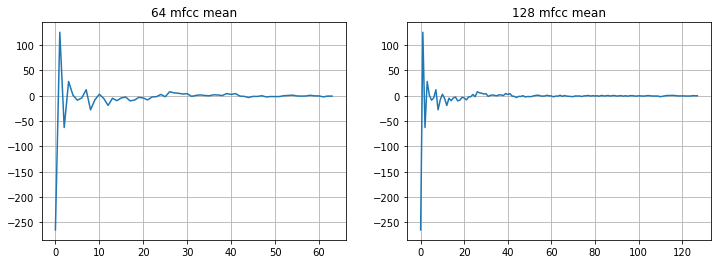

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('64 mfcc mean')
plt.plot(Xsinal_64mfcc_mean[0])
plt.grid()

plt.subplot(1,2,2)
plt.title('128 mfcc mean')
plt.plot(Xsinal_128mfcc_mean[0])

plt.grid()
plt.show()

In [22]:
!ls -lah $DIR_MFCC/mean

total 1,1M
drwxrwxrwx 1 hbrandao hbrandao  304 mar 22 01:53 .
drwxrwxrwx 1 hbrandao hbrandao  320 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 683K mar 22 01:58 Xsinal_128mfcc_mean.npy
-rwxrwxrwx 1 hbrandao hbrandao 342K mar 22 01:58 Xsinal_64mfcc_mean.npy


In [23]:
del Xsinal_64mfcc_mean, Xsinal_128mfcc_mean

## \# -------------------- Num. MFCCs

In [24]:
EX = {64: {}, 128: {}}

### 64 mfccs

In [25]:
QNT_MFCC = 64

In [26]:
Xsinal_pad_64mfcc = None
Xsinal_stretch_64mfcc = None
Xsinal_tile_64mfcc = None

In [27]:
Xsinal_pad_64mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_pad]
)

print(Xsinal_pad_64mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_pad_64mfcc.npy', Xsinal_pad_64mfcc)

(1364, 64, 472)


In [28]:
Xsinal_stretch_64mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_stretch]
)

print(Xsinal_stretch_64mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_stretch_64mfcc.npy', Xsinal_stretch_64mfcc)

(1364, 64, 472)


In [29]:
Xsinal_tile_64mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_tile]
)

print(Xsinal_tile_64mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_tile_64mfcc.npy', Xsinal_tile_64mfcc)

(1364, 64, 472)


In [41]:
EX[64]['pad'] = Xsinal_pad_64mfcc[0]
EX[64]['stretch'] = Xsinal_stretch_64mfcc[0]
EX[64]['tile'] = Xsinal_tile_64mfcc[0]

In [42]:
del Xsinal_pad_64mfcc, Xsinal_stretch_64mfcc, Xsinal_tile_64mfcc

In [43]:
!ls -la $DIR_MFCC/64

total 482868
drwxrwxrwx 1 hbrandao hbrandao       440 mar 22 01:54 .
drwxrwxrwx 1 hbrandao hbrandao       320 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 164814976 mar 22 02:05 Xsinal_pad_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 164814976 mar 22 02:05 Xsinal_stretch_64mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 164814976 mar 22 02:06 Xsinal_tile_64mfcc.npy


### 128 mfccs

In [44]:
QNT_MFCC = 128

In [45]:
Xsinal_pad_128mfcc = None
Xsinal_stretch_128mfcc = None
Xsinal_tile_128mfcc = None

In [46]:
Xsinal_pad_128mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_pad]
)

print(Xsinal_pad_128mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_pad_128mfcc.npy', Xsinal_pad_128mfcc)

(1364, 128, 472)


In [47]:
Xsinal_stretch_128mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_stretch]
)

print(Xsinal_stretch_128mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_stretch_128mfcc.npy', Xsinal_stretch_128mfcc)

(1364, 128, 472)


In [48]:
Xsinal_tile_128mfcc = np.array(
    [librosa.feature.mfcc(y=_, sr=SAMPLING_RATE, n_mfcc=QNT_MFCC) for _ in Xsinal_tile]
)

print(Xsinal_tile_128mfcc.shape)

np.save(f'{DIR_MFCC}/{QNT_MFCC}/Xsinal_tile_128mfcc.npy', Xsinal_tile_128mfcc)

(1364, 128, 472)


In [51]:
EX[128]['pad'] = Xsinal_pad_128mfcc[0]
EX[128]['stretch'] = Xsinal_stretch_128mfcc[0]
EX[128]['tile'] = Xsinal_tile_128mfcc[0]

In [76]:
del Xsinal_pad_128mfcc, Xsinal_stretch_128mfcc, Xsinal_tile_128mfcc

In [77]:
!ls -la $DIR_MFCC/128

total 965724
drwxrwxrwx 1 hbrandao hbrandao       440 mar 22 01:55 .
drwxrwxrwx 1 hbrandao hbrandao       320 mar 22 01:49 ..
-rwxrwxrwx 1 hbrandao hbrandao 329629824 mar 22 02:10 Xsinal_pad_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 329629824 mar 22 02:10 Xsinal_stretch_128mfcc.npy
-rwxrwxrwx 1 hbrandao hbrandao 329629824 mar 22 02:11 Xsinal_tile_128mfcc.npy


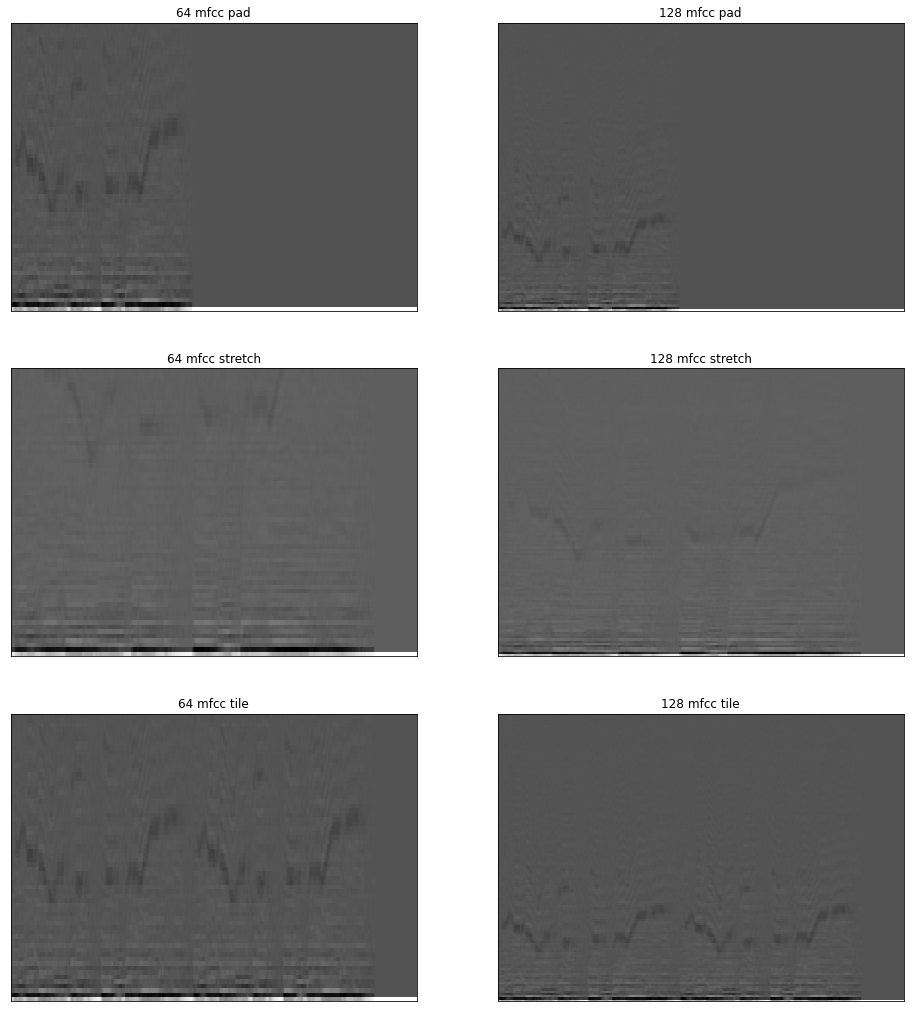

In [78]:
plt.figure(figsize=(16,18))

plt.subplot(3,2,1)
plt.title('64 mfcc pad')
librosa.display.specshow(EX[64]['pad'], cmap='Greys')

plt.subplot(3,2,2)
plt.title('128 mfcc pad')
librosa.display.specshow(EX[128]['pad'], cmap='Greys')

plt.subplot(3,2,3)
plt.title('64 mfcc stretch')
librosa.display.specshow(EX[64]['stretch'], cmap='Greys')

plt.subplot(3,2,4)
plt.title('128 mfcc stretch')
librosa.display.specshow(EX[128]['stretch'], cmap='Greys')

plt.subplot(3,2,5)
plt.title('64 mfcc tile')
librosa.display.specshow(EX[64]['tile'], cmap='Greys')

plt.subplot(3,2,6)
plt.title('128 mfcc tile')
librosa.display.specshow(EX[128]['tile'], cmap='Greys')

plt.grid()
plt.show()